In [47]:
#importing necessary packages
import pandas as pd
import numpy as np
#importing cv2 for image processings
import cv2
import matplotlib.pyplot as plt
#tensorflow to implement Artificial Nueral Network
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

### Artificial Neural Network


In [48]:
#function to train the artificial nueral network model
def ANN_model():
    ann=models.Sequential([
        layers.Flatten(input_shape=[50,50,3]),
        layers.Dense(130,activation='relu'),
        layers.Dense(200,activation='relu'),
        layers.Dense(10,activation='sigmoid')
    ])
    ann.compile(optimizer='Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    ann.fit(x_train,y_train,epochs=50)
    return ann

### SVM

In [49]:
# SVM using RBF kernel
def SVM_rbf_model():
    from sklearn import svm
    svm = svm.SVC(kernel='rbf', probability=True, random_state=42)
    svm.fit(x_train, y_train)

    y_pred = svm.predict(x_test)
    print(classification_report(y_test,y_pred))

In [50]:
#svm using poly kernel
def SVM_Poly_model():
    from sklearn import svm
    svm = svm.SVC(kernel='poly', probability=True, random_state=42)
    svm.fit(x_train, y_train)

    y_pred = svm.predict(x_test)
    print(classification_report(y_test,y_pred))

### Identifying Labels from dataset

In [51]:
import re
#identifying the target output Labels
def my_label(image_name):
    name=re.split('[-.]+',image_name)
    name=name[-3]
    if name in classes:
        return classes.index(name)
    else:
        classes.append(name)
        return classes.index(name)

### Data PRocessing

In [52]:
import os
#to shuffle the data
from random import shuffle
from tqdm import tqdm

In [53]:
def my_data():
    data=[]
    for folder in tqdm(os.listdir("Images")):
        t_path=os.path.join("Images"+"//"+folder)
        for img in tqdm(os.listdir("Images"+"//"+folder)):
            path=os.path.join(t_path,img)
            #reading images one by one
            img_data=cv2.imread(path)
            #resizing them into 50x50
            img_data=cv2.resize(img_data,(50,50))
            #converting images into numpy array vectors
            data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data    

In [54]:
classes=[]
data=my_data()

100%|██████████| 4/4 [00:01<00:00,  3.46it/s]


In [55]:
#printing all target labels
classes

['cat', 'dog', 'horse', 'rider']

In [56]:
#code t display an image
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [57]:

x=np.array([a[0] for a in data]).reshape(-1,50,50,3)
y=np.array([a[1] for a in data])
from sklearn.model_selection import train_test_split
#splitting data , training:80% , testing:20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

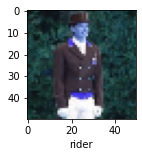

In [58]:
plot_sample(x_train,y_train,7)

In [59]:
#Normalizing the pixels of images
x_train=x_train/255.0
x_test=x_test/255.0

### implementing Artificial Neural Networks

In [60]:
#calling ann function
ann=ANN_model()
ann.evaluate(x_test,y_test)

Epoch 1/50
21/21 [==============================] - 0s 4ms/step - loss: 2.9523 - accuracy: 0.2663
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 1.3287 - accuracy: 0.4102
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 1.2572 - accuracy: 0.4241
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 1.2031 - accuracy: 0.4628
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 1.0992 - accuracy: 0.4923
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 1.0368 - accuracy: 0.5619
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 1.0090 - accuracy: 0.5867
Epoch 8/50
21/21 [==============================] - 0s 5ms/step - loss: 0.9554 - accuracy: 0.5851
Epoch 9/50
21/21 [==============================] - 0s 5ms/step - loss: 0.9385 - accuracy: 0.6347
Epoch 10/50
21/21 [==============================] - 0s 5ms/step - loss: 0.8696 - accuracy: 0.6517
Epoch 11/50
21/21 [

[2.231689453125, 0.5061728358268738]

In [61]:
#printing accuracy, precision and recall of ann model
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.47      0.46      0.46        50
           1       0.34      0.51      0.41        35
           2       0.60      0.66      0.63        32
           3       0.80      0.44      0.57        45

    accuracy                           0.51       162
   macro avg       0.55      0.52      0.52       162
weighted avg       0.56      0.51      0.51       162



###  implementing SVM

In [62]:
x= x.reshape(len(x),-1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [63]:
#implementing SVM using rbf kernel
SVM_rbf_model()

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        32
           1       0.44      0.54      0.49        37
           2       0.78      0.74      0.76        47
           3       0.78      0.61      0.68        46

    accuracy                           0.61       162
   macro avg       0.61      0.60      0.60       162
weighted avg       0.64      0.61      0.62       162



In [64]:
#implementing svm using poly kernel
SVM_Poly_model()

              precision    recall  f1-score   support

           0       0.38      0.62      0.47        32
           1       0.41      0.41      0.41        37
           2       0.77      0.64      0.70        47
           3       0.76      0.54      0.63        46

    accuracy                           0.56       162
   macro avg       0.58      0.55      0.55       162
weighted avg       0.61      0.56      0.57       162

